# Analysis
***

0. [Loading data](#load)
1. [Introduction](#intro)
1. [Scores dictionaries](#scores)
1. [Logistic regression](#lr)
1. [Naive Bayes](#nb)
1. [K-Nearest Neighbor](#knn)
1. [Neural Network](#nn)
1. [Support Vector Machine](#svm)
1. [Decision Trees](#dt)
1. [Random Forest](#rf)
1. [XG-Boost](#xgb)

### 0. Loading data<a id='load'>

To load our data, we will just run the <a href='3_data_manipulation.ipynb'>data manipulation script</a>.

In [1]:
%%capture
%run 3_data_manipulation.ipynb

### 1. Introduction<a id='intro'>

In this section, we will finally perform the analysis on our data. As said before, the main goal of this work is to evaluate the performance of 8 different well-known data science algorithms, in order to find which one is the best for predicting software defects. The algorithms we will use are the following:

<ul>
    <li>Logistic Regression</li>
    <li>Naive Bayes</li>
    <li>K-Nearest Neighbor</li>
    <li>Neural Network</li>
    <li>Support Vector Machine</li>
    <li>Decision Trees</li>
    <li>Random Forest</li>
    <li>XG-Boost</li>
</ul>

After that, we will get our conclusions by comparing two scores: **AUC** and **F1**

   #### 1.1 AUC

To explain better what AUC is, we first need to introduce the concept of **ROC curve**.

The Receiving Operating Charactheristic (ROC) curve is a graph that shows how a model performs among all the possibile thresholds. This graphs consider two values: the **False Positive rate** on the X axis, and the **True Positive rate** on the Y axis. It basically plots the two rates at different thresholds. A ROC curve usually has a behaviour like this:

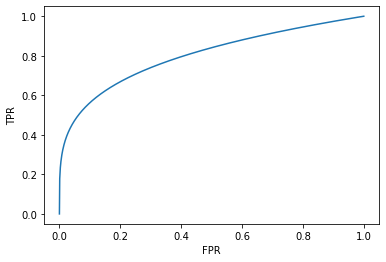

In [2]:
x = np.linspace(0,1,1000)
y = x**(1/4) #this does NOT mean that TPR equals to FPR ^ 1/4. This graph is just explanatory.
plt.plot(x, y)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

The **Area Under the Curve (AUC)** is basically the area between the ROC curve and the X axis.
Given that TPR and FPR are both included in the interval [0,1], the definite integral of the ROC curve (that is, in fact, the AUC) will also be a value between 0 and 1.

#### 1.2 F1 score

The F1 score is a measure computed by the use of two other well-known measures: **precision** and **recall**.

**Precision** is the accuracy of positive values predictions. It is defined as

*Precision =* $ \frac{TP}{TP + FP} $

where *TP* is the n. of true positives and *FP* the n. of false positives.

It is clear that precision alone is not a reliable measure, because, ironically, a model that predicts positives with high cautiousness and returns many false negatives would have an high precision. This is why we need to use another measure too, that is recall.

**Recall** is the ratio of positive istances correctly detected by the model. It is defined as

*Recall =* $\frac{TP}{TP + FN}$

where FN is, now, the n. of false negatives.

**F1 score** is simply a measure that **combines precision and recall**, and it is defined as their **harmonic mean**:

*F1 =* $\frac{TP}{TP + \frac{FP + FN}{2}}$

As the AUC, F1 score is also included between 0 and 1.

### 2. Scores dictionaries<a id='scores'>

We will store scores into 2 new dictionaries that we will call `auc_scores` and `f1_scores`, structured as:

`{`

`model`: `score`

`}`

In [3]:
models = ['LR', 'NB', 'KNN', 'NN', 'SVM', 'DT', 'RF', 'XGB']
auc_scores = dict()
f1_scores = dict()
for key in models:
    auc_scores[key] = list()
    f1_scores[key] = list()

Just to recall, our data is stored into the dictionary `splitted`, in which every *key* (representing a project) is associated to a list that has:
<ul>
    <li>In position <b>0</b>: X train set</li>
    <li>In position <b>1</b>: X test set</li>
    <li>In position <b>2</b>: Y train set</li>
    <li>In position <b>3</b>: Y test set</li>
</ul>

Later, we will have to compute, for each model, 9 AUCs and 9 F1 scores. We can define a function, in order to avoid to repeat the same code multiple times (we assume we'll use this function in a *for* loop)

In [4]:
def compute_scores(model, dataset, auc_scores, f1_scores):
    auc = roc_auc_score(splitted[dataset][3], y_pred, average="weighted")
    auc_scores[model].append(auc)
    f1 = f1_score(splitted[dataset][3], y_pred, average='weighted')
    f1_scores[model].append(f1)

### 3. Logistic regression<a id='lr'>

As first, we will run a Logistic Regression algorithm

In [5]:
from sklearn.linear_model import LogisticRegression

In order to explore it, we will **try the model on `ant`**.

First of all, let's define our model and fit it on `ant` data

In [6]:
LR = LogisticRegression(random_state = 45)
LR.fit(splitted['ant'][0],splitted['ant'][2])

/home/giovanni/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=45)

As we can see, we get a warning saying that the algorithm failed to converge. To solve this issue, as suggested by *scikit* documentation, we just increment the number of maximum iterations. This will make the computation a little heavier, but our prediction will be more accurate.

In [7]:
LR = LogisticRegression(random_state = 45, max_iter=10000)
LR.fit(splitted['ant'][0],splitted['ant'][2])

LogisticRegression(max_iter=10000, random_state=45)

The next step is to compute a prediction based on our *X test* data

In [8]:
y_pred = LR.predict(splitted['ant'][1])
print(f'0: {(y_pred == 0).sum()}\n1: {(y_pred == 1).sum()}')

0: 133
1: 82


Here are the results: our model predicted **136 classes without defects** and **79 defected classes**. Although, we don't know if this prediction is accurate or not. In order to discover it, we will compare this results with the real values included in the *Y test* set through the so called **confusion matrix**:

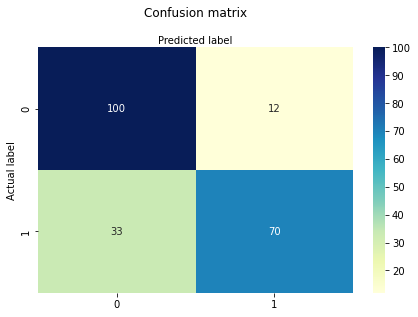

In [9]:
ant_confusion = confusion_matrix(splitted['ant'][3], y_pred)
plot_confusion_matrix(ant_confusion)

In [10]:
print(classification_report(splitted['ant'][3], y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.82       112
         1.0       0.85      0.68      0.76       103

    accuracy                           0.79       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.80      0.79      0.79       215



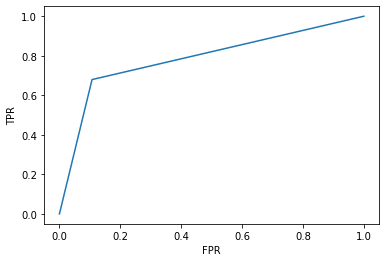

In [11]:
y_pred_prob = LR.predict_proba(splitted['ant'][1])[::,1]
plot_roc(splitted['ant'][3], y_pred_prob)

In [12]:
#auc = roc_auc_score(splitted['ant'][3], y_pred, average ='weighted')
f1 = f1_score(splitted['ant'][3], y_pred, average ='weighted')
#print('AUC: %f\nF1: %f' %(auc, f1))
print(f1)

0.787788452904732


Let's now run Logistic Regression for each dataset and compute the scores

In [13]:
for key in names:
    LR = LogisticRegression(max_iter=10000,random_state=45)
    LR.fit(splitted[key][0],splitted[key][2])
    y_pred = LR.predict(splitted[key][1])
    compute_scores('LR', key, auc_scores, f1_scores)

In [14]:
pd.Series(auc_scores['LR'], index = names)

ant         0.786234
camel       0.685810
ivy         0.737380
jedit       0.649351
log4j       0.681548
tomcat      0.788747
velocity    0.715241
xalan       0.754243
xerces      0.745854
dtype: float64

In [15]:
pd.Series(f1_scores['LR'], index = names)

ant         0.787788
camel       0.682164
ivy         0.745107
jedit       0.648879
log4j       0.708120
tomcat      0.794637
velocity    0.730969
xalan       0.757585
xerces      0.746732
dtype: float64

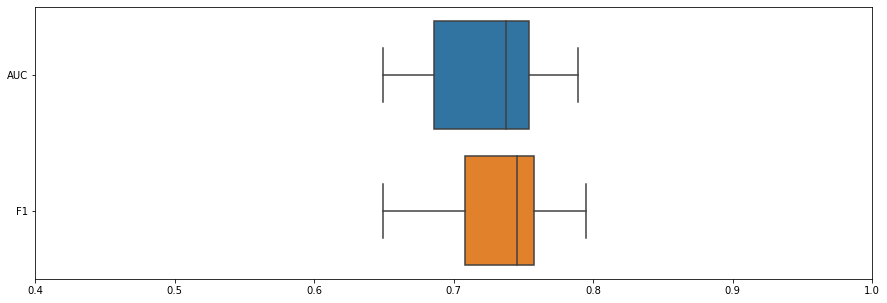

In [16]:
boxplot_single_model_scores('LR')

### 4. Naive Bayes classifier<a id='nb'>

Naive Bayes is a classification algorithm that works based on the Bayes theorem:

$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$

and uses this probability in order to construct the classifiers.

In [17]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [18]:
for key in names:
    NB.fit(splitted[key][0],splitted[key][2])
    y_pred = NB.predict(splitted[key][1])
    compute_scores('NB', key, auc_scores, f1_scores)

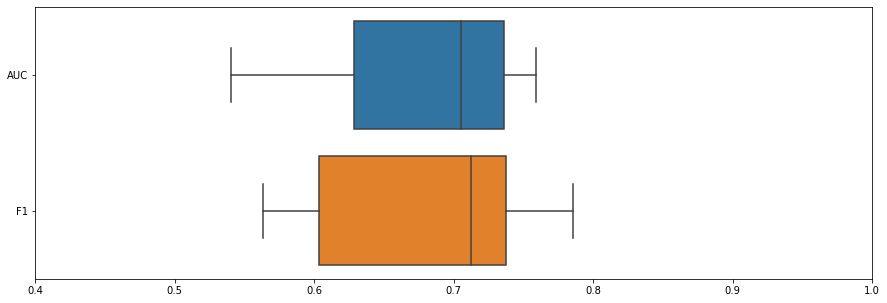

In [19]:
boxplot_single_model_scores('NB')

### 5. K-Nearest Neighbor<a id='knn'>

Noe we will run k-Nearest Neighbor algorithm

In [20]:
from sklearn.neighbors import KNeighborsClassifier

Let's try kNN on `ant`

In [21]:
KNN = KNeighborsClassifier()
KNN.fit(splitted['ant'][0],splitted['ant'][2])
y_pred = KNN.predict(splitted['ant'][1])
auc = roc_auc_score(splitted['ant'][3], y_pred, average ='weighted')
f1 = f1_score(splitted['ant'][3], y_pred, average ='weighted')
print('AUC: %f\nF1: %f' %(auc, f1))

AUC: 0.838289
F1: 0.837259


##### k Parameter
A very important parameter in k-Nearest Neighbors is *k*, that is the number of neighbors of a point. It is an *hyperparameter*, which means it is a characteristics that is external to the model and cannot be derived by training.

Default *k* in the related *scikit* function is 5, but we don't know if it is the optimal value.

Thankfully, *scikit* provides an *hyperparameter optimization tool*, called **GridSearch**. GridSearch runs the algorithm with different hyperparameters and finds the one that best fits to the model. Of course, on the other side it can require a lot of computational resources.


Let's try to use **GridSearch to find the optimal k and improve the performance of the model**

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
parameters = {"n_neighbors": range(1,10)}
gridsearch = GridSearchCV(KNN, parameters)

In [24]:
neighbors = dict()
for key in names:
    gridsearch.fit(splitted[key][0],splitted[key][2])
    neighbors[key] = gridsearch.best_params_.get('n_neighbors')
neighbors

{'ant': 1,
 'camel': 1,
 'ivy': 1,
 'jedit': 7,
 'log4j': 2,
 'tomcat': 1,
 'velocity': 1,
 'xalan': 1,
 'xerces': 1}

So, now let's retry to run KNN on `ant`, now with the optimal *k*

In [25]:
KNN = KNeighborsClassifier(neighbors.get('ant'))
KNN.fit(splitted['ant'][0],splitted['ant'][2])
y_pred = KNN.predict(splitted['ant'][1])
auc = roc_auc_score(splitted['ant'][3], y_pred, average ='weighted')
f1 = f1_score(splitted['ant'][3], y_pred, average ='weighted')
print('AUCC: %f\nF1: %f' %(auc, f1))

AUCC: 0.862951
F1: 0.860254


As a result, scores improved in a very strong way

So now we can **run kNN on the rest of the datasets** and observe the results

In [26]:
for key in names:
    KNN = KNeighborsClassifier(n_neighbors = neighbors.get(key))
    KNN.fit(splitted[key][0],splitted[key][2])
    y_pred = KNN.predict(splitted[key][1])
    compute_scores('KNN', key, auc_scores, f1_scores)

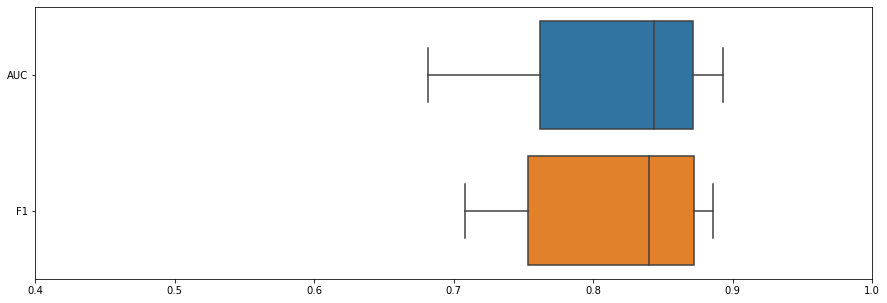

In [27]:
boxplot_single_model_scores('KNN')

### 6. Neural Network<a id='nn'>

To perform analysis with Neural Networks we will use **MLPC (Multi-layer perceptron classifier)**

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
NN = MLPClassifier()
NN.fit(splitted['ant'][0],splitted['ant'][2])
y_pred = NN.predict(splitted['ant'][1])
auc = roc_auc_score(splitted['ant'][3], y_pred, average ='weighted')
f1 = f1_score(splitted['ant'][3], y_pred, average ='weighted')
print('AUCC: %f\nF1: %f' %(auc, f1))

AUCC: 0.765257
F1: 0.764988


In [30]:
for key in names:
    NN = MLPClassifier(max_iter = 2000)
    NN.fit(splitted[key][0], splitted[key][2])
    y_pred = NN.predict(splitted[key][1])
    compute_scores('NN', key, auc_scores, f1_scores)

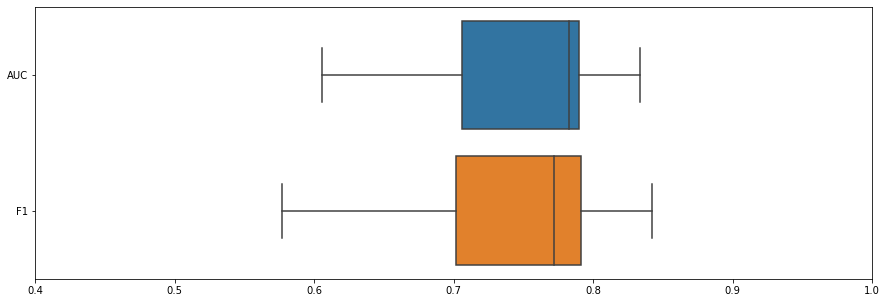

In [31]:
boxplot_single_model_scores('NN')

### 7. Support Vector Machines<a id='svm'>

In [32]:
from sklearn.svm import SVC

In [33]:
SVM = SVC()
SVM.fit(splitted['ant'][0],splitted['ant'][2])
y_pred = SVM.predict(splitted['ant'][1])
auc = roc_auc_score(splitted['ant'][3], y_pred, average ='weighted')
f1 = f1_score(splitted['ant'][3], y_pred, average ='weighted')
print('AUC: %f\nF1: %f' %(auc, f1))

AUC: 0.748180
F1: 0.748839


In [34]:
for key in names:
    SVM.fit(splitted[key][0],splitted[key][2])
    y_pred = SVM.predict(splitted[key][1])
    compute_scores('SVM', key, auc_scores, f1_scores)

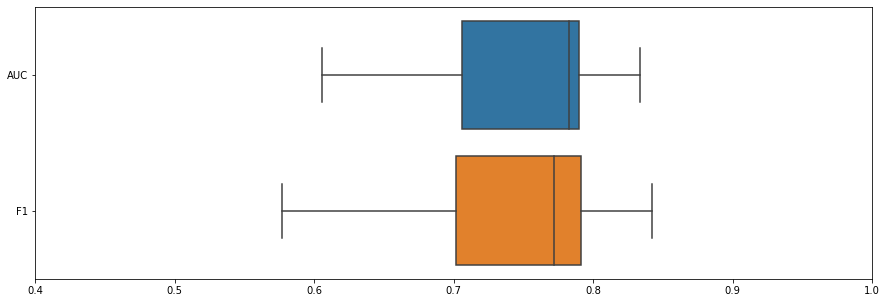

In [35]:
boxplot_single_model_scores('NN')

### 8. Decision Trees<a id='dt'>

Now we will analyze data using Decision Trees. Decision Trees have an important *hyperparameter*, that is the criterion for splitting the nodes, which can be *Gini* or *entropy*. We will decide wich one to use by using GridSearch, as before.

In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [37]:
DT = DecisionTreeClassifier()
DT.fit(splitted['ant'][0],splitted['ant'][2])
y_pred = DT.predict(splitted['ant'][1])
auc = roc_auc_score(splitted['ant'][3], y_pred, average ='weighted')
f1 = f1_score(splitted['ant'][3], y_pred, average ='weighted')
print('AUC: %f\nF1: %f' %(auc, f1))

AUC: 0.828580
F1: 0.827981


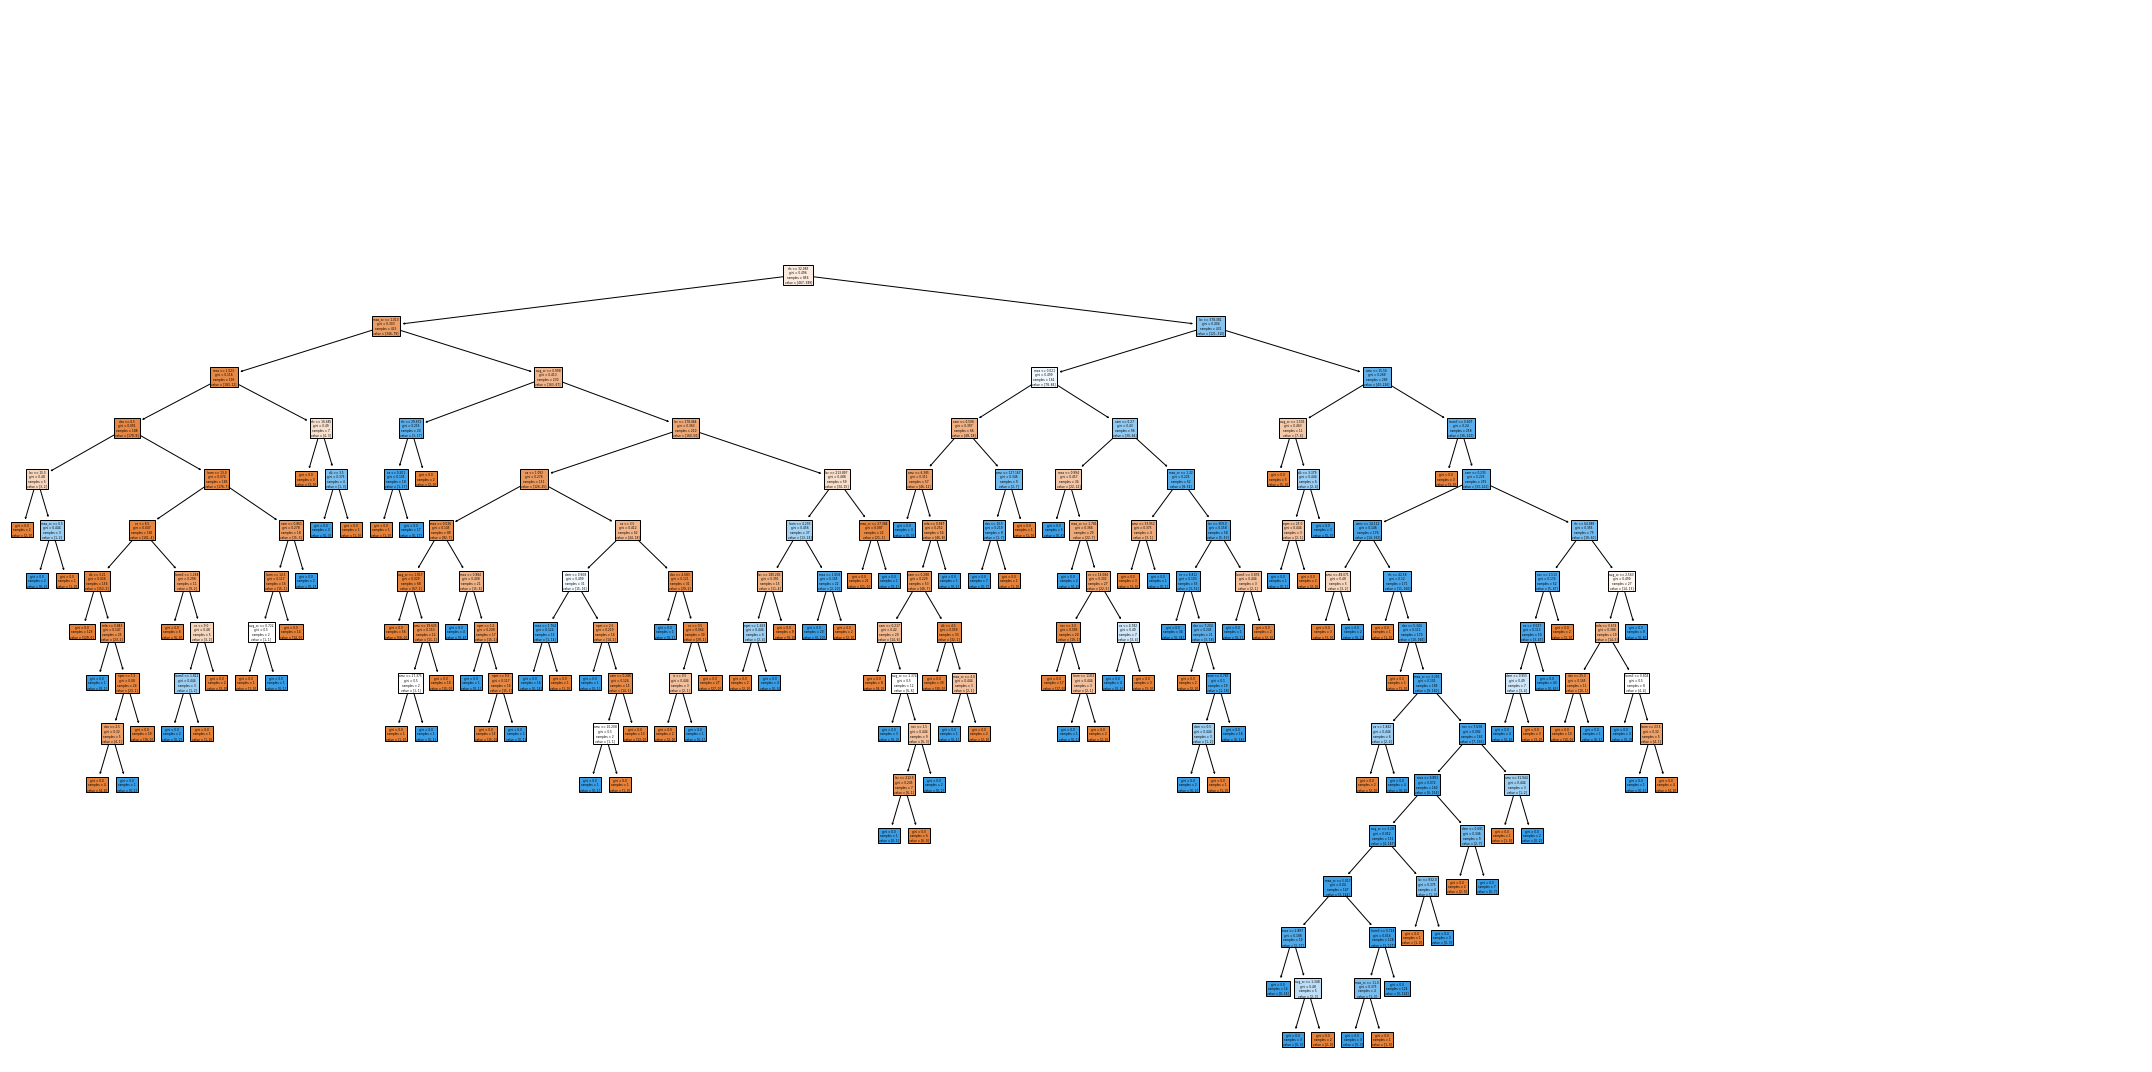

In [38]:
def plot_decision_tree(decisionTree, fileName):
    plt.figure(figsize=(30,15))
    tree.plot_tree(DT, filled = True, feature_names = list(ant.columns))
    savefig(fileName)
    plt.show()
    
plot_decision_tree(DT, 'ant_decision_tree')

In [39]:
parameters = {"criterion": ['gini','entropy']}
gridsearch = GridSearchCV(DT, parameters)

In [40]:
criteria = dict()
for key in names:
    gridsearch.fit(splitted['ant'][0],splitted['ant'][2])
    criteria[key] = gridsearch.best_params_.get('criterion')
criteria

{'ant': 'gini',
 'camel': 'entropy',
 'ivy': 'entropy',
 'jedit': 'gini',
 'log4j': 'gini',
 'tomcat': 'entropy',
 'velocity': 'gini',
 'xalan': 'entropy',
 'xerces': 'gini'}

In [41]:
for key in names:
    DT = DecisionTreeClassifier(criterion=criteria.get(key))
    DT.fit(splitted[key][0],splitted[key][2])
    y_pred = DT.predict(splitted[key][1])
    compute_scores('DT', key, auc_scores, f1_scores)

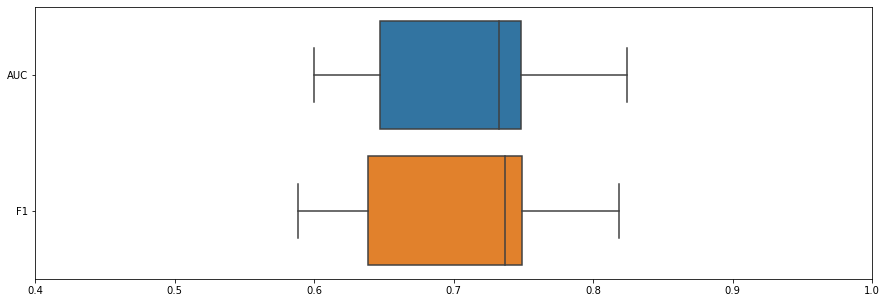

In [42]:
boxplot_single_model_scores('SVM')

### 9. Random Forest<a id='rf'>

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RF = RandomForestClassifier()
RF.fit(splitted['ant'][0],splitted['ant'][2])
y_pred = RF.predict(splitted['ant'][1])
auc = roc_auc_score(splitted['ant'][3], y_pred, average ='weighted')
f1 = f1_score(splitted['ant'][3], y_pred, average ='weighted')
print('AUC: %f\nF1: %f' %(auc, f1))

AUC: 0.887786
F1: 0.888319


In [45]:
for key in names:
    RF = RandomForestClassifier(criterion=criteria.get(key))
    RF.fit(splitted[key][0],splitted[key][2])
    y_pred = RF.predict(splitted[key][1])
    compute_scores('RF', key, auc_scores, f1_scores)

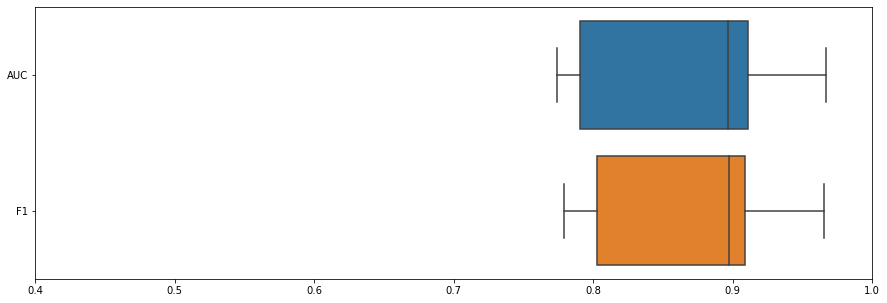

In [46]:
boxplot_single_model_scores('RF')

### 10. XGBoost<a id='xgb'>

XGBoost stands for *eXtreme Gradient Boosting*

**REMEMBER: INSTALL OF XGBOOST LIBRARY NEEDED**

In [47]:
from xgboost import XGBClassifier

In [48]:
XGB = XGBClassifier(use_label_encoder=False, eval_metric = 'logloss')
XGB.fit(splitted['ant'][0],splitted['ant'][2])
y_pred = XGB.predict(splitted['ant'][1])
auc = roc_auc_score(splitted['ant'][3], y_pred, average ='weighted')
f1 = f1_score(splitted['ant'][3], y_pred, average ='weighted')
print('AUC: %f\nF1: %f' %(auc, f1))

AUC: 0.877687
F1: 0.878833


In [49]:
for key in names:
    XGB.fit(splitted[key][0],splitted[key][2])
    y_pred = XGB.predict(splitted[key][1])
    compute_scores('XGB', key, auc_scores, f1_scores)

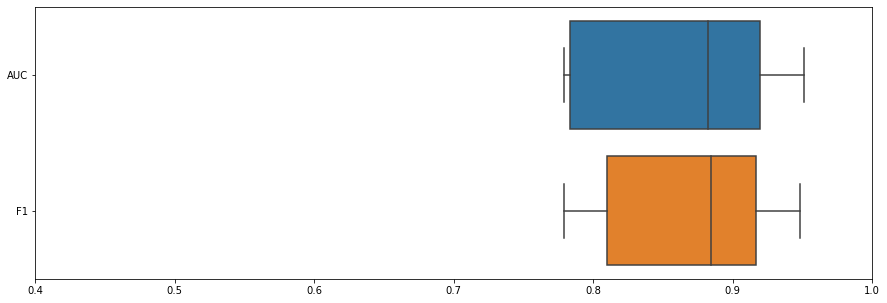

In [50]:
boxplot_single_model_scores('XGB')